Reading Raw Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = './listings_details.csv'
data = pd.read_csv(file_path)

<ipython-input-1-e0889d574ddd>:6: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Manual Feature Selection

In [ ]:
df = data[["id","property_type","room_type","accommodates","bathrooms","bedrooms","beds","amenities","price","minimum_nights","maximum_nights"]]
df.head(3)

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,2818,Apartment,Private room,2,1.5,1.0,2.0,"{Internet,Wifi,""Paid parking off premises"",""Bu...",$59.00,3,15
1,3209,Apartment,Entire home/apt,5,1.0,2.0,2.0,"{Internet,Wifi,Kitchen,""Paid parking off premi...",$160.00,4,20
2,20168,Townhouse,Entire home/apt,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Paid parking off premises"",...",$80.00,1,1000


Checking For Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20030 non-null  int64  
 1   property_type   20030 non-null  object 
 2   room_type       20030 non-null  object 
 3   accommodates    20030 non-null  int64  
 4   bathrooms       20020 non-null  float64
 5   bedrooms        20022 non-null  float64
 6   beds            20023 non-null  float64
 7   amenities       20030 non-null  object 
 8   price           20030 non-null  object 
 9   minimum_nights  20030 non-null  int64  
 10  maximum_nights  20030 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


Droping Row For Any Null Value Attribue

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20006 entries, 0 to 20029
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20006 non-null  int64  
 1   property_type   20006 non-null  object 
 2   room_type       20006 non-null  object 
 3   accommodates    20006 non-null  int64  
 4   bathrooms       20006 non-null  float64
 5   bedrooms        20006 non-null  float64
 6   beds            20006 non-null  float64
 7   amenities       20006 non-null  object 
 8   price           20006 non-null  object 
 9   minimum_nights  20006 non-null  int64  
 10  maximum_nights  20006 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.8+ MB


Converting price attribute from string to float type

In [ ]:
df[['price']].head(3)

,price
0,$59.00
1,$160.00
2,$80.00


In [ ]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df[['price']].head(3)

,price
0,59.0
1,160.0
2,80.0


Removing Outliers

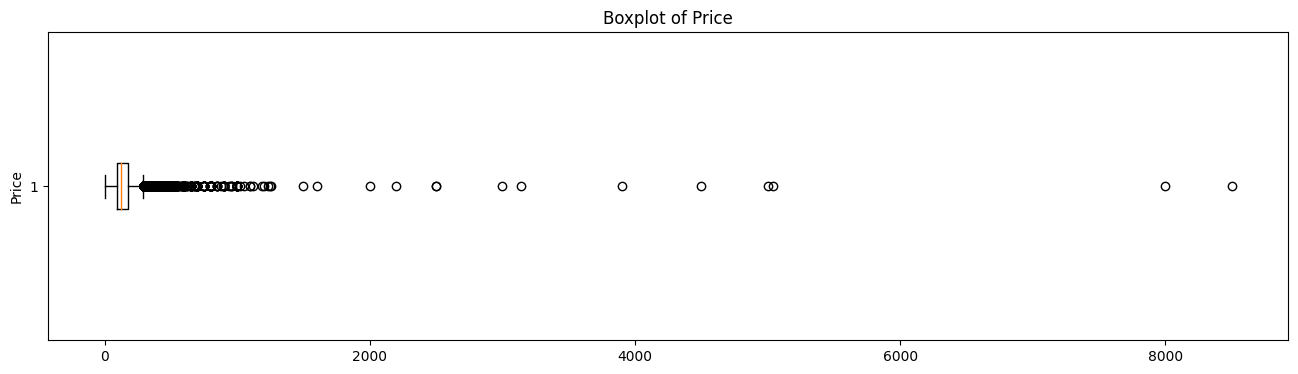

In [ ]:
plt.figure(figsize=(16, 4))
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

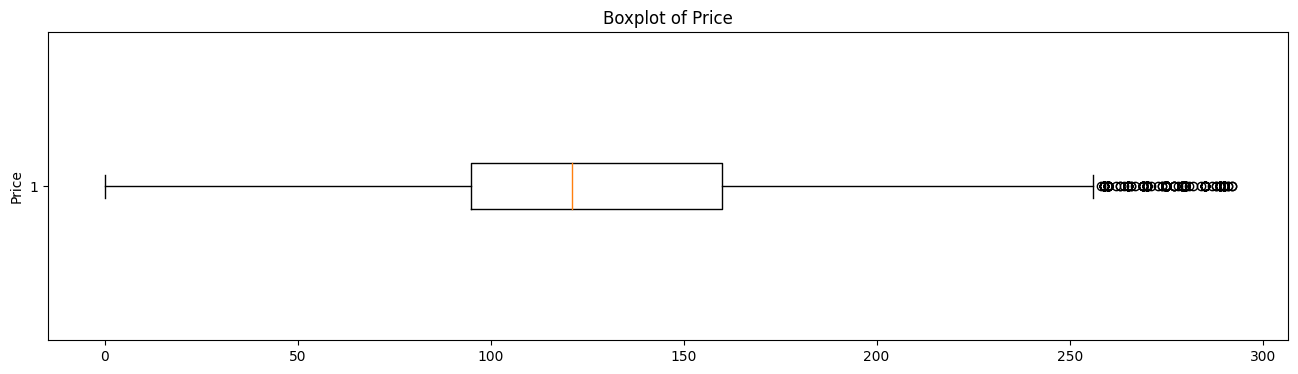

In [ ]:
plt.figure(figsize=(16, 4))
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

One Hot Encoding Categorical Values Of Property Type And Room Type

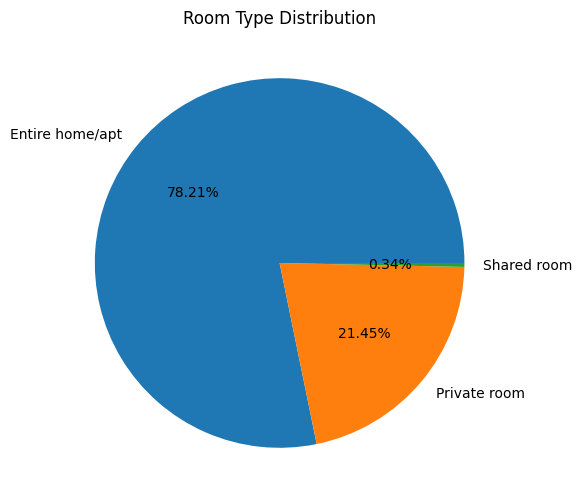

In [ ]:
property_counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.2f%%')
plt.title('Room Type Distribution')
plt.show()

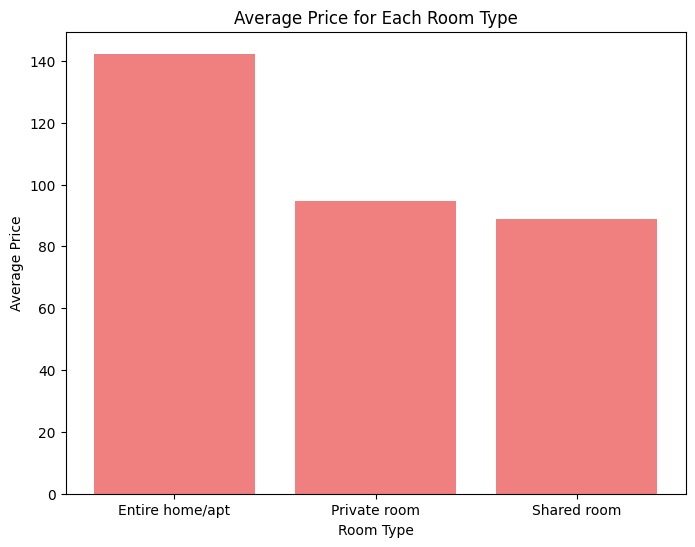

In [ ]:
avg_price_property = df.groupby('room_type')['price'].mean()

plt.figure(figsize=(8, 6))
plt.bar(avg_price_property.index, avg_price_property.values, color='lightcoral')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price for Each Room Type')
plt.show()

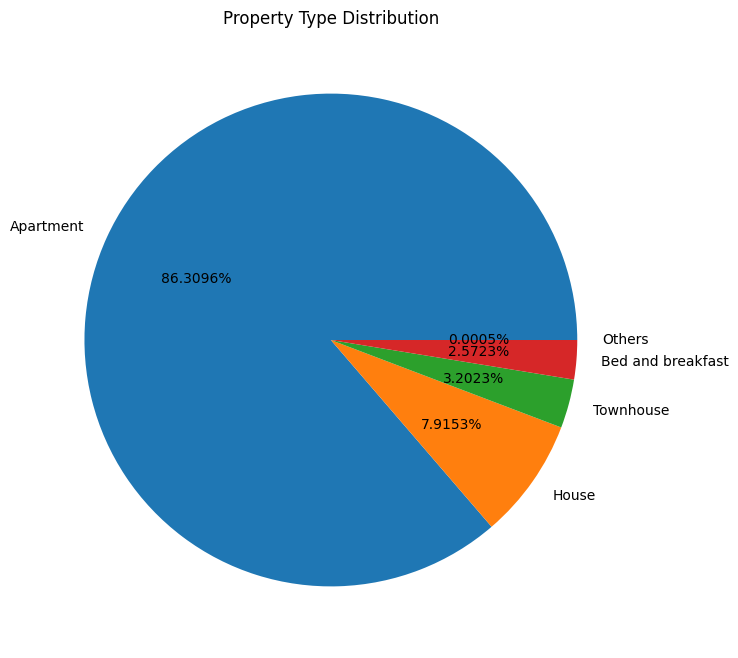

In [ ]:
# Set a threshold for grouping smaller categories
threshold = 0.02  # 2% threshold

# Calculate the value counts
room_counts = df['property_type'].value_counts()

# Calculate the relative frequency
room_counts_relative = room_counts / room_counts.sum()

# Group smaller categories into "Others"
small_categories = room_counts_relative[room_counts_relative < threshold]
room_counts = room_counts[room_counts_relative >= threshold]
room_counts['Others'] = small_categories.sum()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.4f%%')
plt.title('Property Type Distribution')
plt.show()

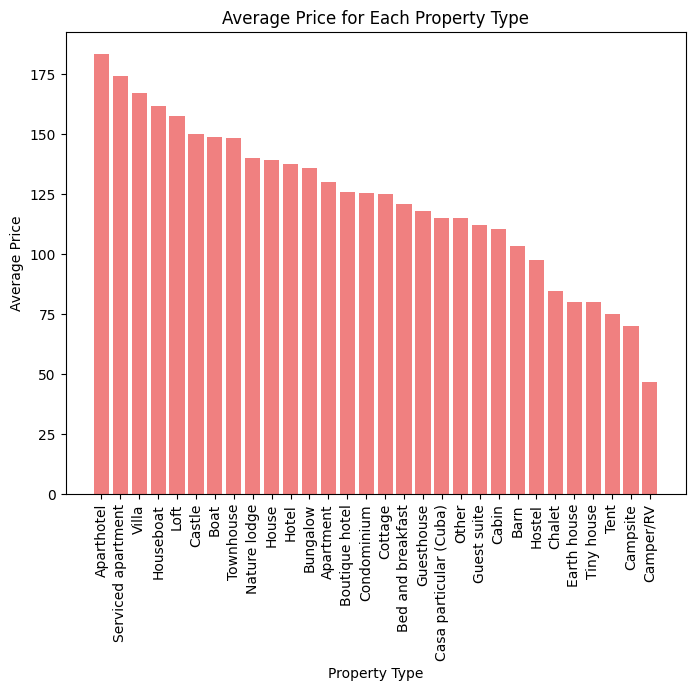

In [ ]:
avg_price_property = df.groupby('property_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(avg_price_property.index, avg_price_property.values, color='lightcoral')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.title('Average Price for Each Property Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['property_type','room_type'])

Processing amenities attribute

In [ ]:
df[['amenities']].head(3)

,amenities
0,"{Internet,Wifi,""Paid parking off premises"",""Bu..."
1,"{Internet,Wifi,Kitchen,""Paid parking off premi..."
2,"{TV,Internet,Wifi,""Paid parking off premises"",..."


- Converting to array of strings

In [ ]:
df['amenities'] = df['amenities'].str.replace(r'[{}"]', '', regex=True).str.replace(r'\(.*?\)', '', regex=True)
df['amenities'] = df['amenities'].str.split(',')
df[['amenities']].head(3)

,amenities
0,"[Internet, Wifi, Paid parking off premises, Bu..."
1,"[Internet, Wifi, Kitchen, Paid parking off pre..."
2,"[TV, Internet, Wifi, Paid parking off premises..."


- One Hot Encoding Categorical Values Of Amenities

In [ ]:
df = df.explode('amenities')
df['amenities'] = df['amenities'].str.strip()
df = pd.get_dummies(df, columns=['amenities']).groupby('id').max()

- Droping Some Ambigous Amenities

In [ ]:
df = df.drop(["amenities_Other","amenities_","amenities_translation missing: en.hosting_amenity_49","amenities_translation missing: en.hosting_amenity_50"], axis=1)

Scaling Values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
unscaled_price = df['price'].values.reshape(-1, 1)
df = pd.DataFrame(scaler.fit_transform(df.drop(columns=['price'])), columns=df.columns.drop('price'))
df['price'] = unscaled_price
df.head(3)


,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,...,amenities_Wheelchair accessible,amenities_Wide clearance to bed,amenities_Wide clearance to shower,amenities_Wide doorway,amenities_Wide entryway,amenities_Wide hallway clearance,amenities_Wifi,amenities_Window guards,amenities_toilet,price
0,0.0625,0.014925,0.083333,0.06250,0.002,0.00140,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0
1,0.2500,0.009950,0.166667,0.06250,0.003,0.00190,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,160.0
2,0.0625,0.009950,0.083333,0.03125,0.000,0.09992,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0


In [ ]:
df.to_csv('./processed_data.csv', index=False)